In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer



In [2]:
breast = load_breast_cancer()


In [3]:
breast_data = breast.data
#breast_data.shape

In [4]:
breast_input = pd.DataFrame(breast_data)
#breast_input.head()

In [5]:
breast_labels = breast.target
#breast_labels.shape

In [6]:
labels = np.reshape(breast_labels,(569,1))

In [7]:
final_breast_data = np.concatenate([breast_data,labels],axis=1)

In [8]:
final_breast_data.shape

(569, 31)

In [9]:
breast_dataset = pd.DataFrame(final_breast_data)

In [10]:
features = breast.feature_names
#features

In [11]:
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels
#breast_dataset.head()

In [12]:
# P1

In [13]:
X_Data = breast_dataset.iloc[:, :30]
Y_Data = breast_dataset.iloc[:, 30]

In [14]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
Scaled_X = Scaler.fit_transform(X_Data)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Scaled_X, Y_Data, test_size = .2, random_state = 0)

In [16]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [17]:
Y_pred = classifier.predict(X_test)


In [18]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)

In [19]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.9649122807017544
Precision: 0.9701492537313433
Recall: 0.9701492537313433


Text(0.5, 257.44, 'Predicted label')

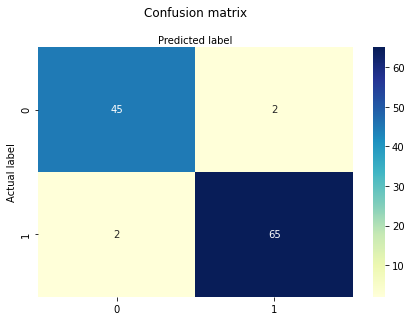

In [20]:
import seaborn as sns
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [21]:
# P2

In [22]:
from sklearn.decomposition import PCA
Accuracy_score = np.zeros(29)
Precision_score = np.zeros(29)
Recall_score = np.zeros(29)

for i in range(29):
    pca = PCA(n_components=i+1)
    principalComponents = pca.fit_transform(Scaled_X)
    principalDf = pd.DataFrame(data = principalComponents)
    X_train2, X_test2, Y_train2, Y_test2 = train_test_split(principalDf, Y_Data, test_size = .2, random_state = 0) 
    classifier = LogisticRegression(random_state = 0)
    classifier.fit(X_train2, Y_train2)
    Y_pred2 = classifier.predict(X_test2)
    Accuracy_score[i] = metrics.accuracy_score(Y_test2, Y_pred2)
    Precision_score[i]= metrics.precision_score(Y_test2, Y_pred2)
    Recall_score[i] = metrics.recall_score(Y_test2, Y_pred2)
    

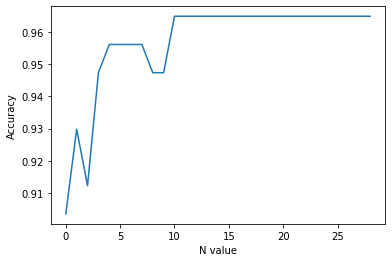

In [23]:
plt.figure()
plt.plot(range(29),Accuracy_score)
plt.xlabel('N value')
plt.ylabel('Accuracy')
plt.show()

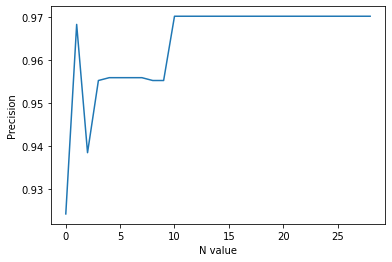

In [24]:
plt.figure()
plt.plot(range(29),Precision_score)
plt.xlabel('N value')
plt.ylabel('Precision')
plt.show()

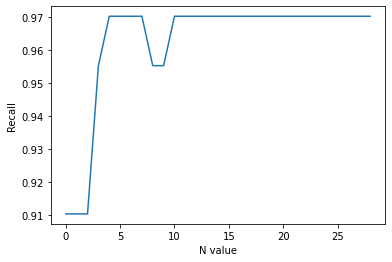

In [25]:
plt.figure()
plt.plot(range(29),Recall_score)
plt.xlabel('N value')
plt.ylabel('Recall')
plt.show()

In [26]:
# Optimum K appears to be between 10 - 13

In [27]:
# P3

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)
lda_t = lda.fit_transform(X_Data,Y_Data)

In [29]:
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(lda_t, Y_Data, test_size = .2, random_state = 0) 
lda.fit(X_train3, Y_train3)
Y_pred3 = lda.predict(X_test3)
cnf3 = confusion_matrix(Y_test3, Y_pred3)

In [30]:
print("Accuracy:",metrics.accuracy_score(Y_test3, Y_pred3))
print("Precision:",metrics.precision_score(Y_test3, Y_pred3))
print("Recall:",metrics.recall_score(Y_test3, Y_pred3))

Accuracy: 0.9824561403508771
Precision: 0.9710144927536232
Recall: 1.0


In [31]:
# P4

In [32]:
X_train4, X_test4, Y_train4, Y_test4 = train_test_split(lda_t, Y_Data, test_size = .2, random_state = 0)
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train4, Y_train4)
Y_pred4 = classifier.predict(X_test4)


In [33]:
print("Accuracy:",metrics.accuracy_score(Y_test4, Y_pred4))
print("Precision:",metrics.precision_score(Y_test4, Y_pred4))
print("Recall:",metrics.recall_score(Y_test4, Y_pred4))

Accuracy: 0.9736842105263158
Precision: 0.9705882352941176
Recall: 0.9850746268656716
